Mina Valizadeh

UIN: 667738558

Homework1 CS594

In [1]:
# All Import Statements Defined Here
# Note: Do not add to this list.
# All the dependencies you need, can be installed by running .
# ----------------
import sys
assert sys.version_info[0]==3
assert sys.version_info[1] >= 5
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
START_TOKEN = '<START>'
END_TOKEN = '<END>'
np.random.seed(0)
random.seed(0)
# ----------------

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [0]:
def read_corpus(category="crude"):

    files = reuters.fileids(category)
    return [[START_TOKEN] + [w.lower() for w in list(reuters.words(f))] + [END_TOKEN] for f in files]

In [3]:
reuters_corpus = read_corpus()
pprint.pprint(reuters_corpus[:3], compact=True, width=100)

[['<START>', 'japan', 'to', 'revise', 'long', '-', 'term', 'energy', 'demand', 'downwards', 'the',
  'ministry', 'of', 'international', 'trade', 'and', 'industry', '(', 'miti', ')', 'will', 'revise',
  'its', 'long', '-', 'term', 'energy', 'supply', '/', 'demand', 'outlook', 'by', 'august', 'to',
  'meet', 'a', 'forecast', 'downtrend', 'in', 'japanese', 'energy', 'demand', ',', 'ministry',
  'officials', 'said', '.', 'miti', 'is', 'expected', 'to', 'lower', 'the', 'projection', 'for',
  'primary', 'energy', 'supplies', 'in', 'the', 'year', '2000', 'to', '550', 'mln', 'kilolitres',
  '(', 'kl', ')', 'from', '600', 'mln', ',', 'they', 'said', '.', 'the', 'decision', 'follows',
  'the', 'emergence', 'of', 'structural', 'changes', 'in', 'japanese', 'industry', 'following',
  'the', 'rise', 'in', 'the', 'value', 'of', 'the', 'yen', 'and', 'a', 'decline', 'in', 'domestic',
  'electric', 'power', 'demand', '.', 'miti', 'is', 'planning', 'to', 'work', 'out', 'a', 'revised',
  'energy', 'supply

In [0]:
# Question 1.1


def distinct_words(corpus):
    
    corpus_words=[]
    num_corpus_words=-1
    
    for x in corpus:
        for y in x:
            corpus_words.append(y)
            
    corpus_words_set= set(corpus_words)
    corpus_words_list=list(corpus_words_set)
    final_corpus_words=sorted(corpus_words_list)
    num_corpus_words= len(final_corpus_words)
    
    return final_corpus_words,num_corpus_words



In [5]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness.
# ---------------------

# Define toy corpus
test_corpus = ["START All that glitters isn't gold END".split(" "), "START All's well that ends well END".split(" ")]
test_corpus_words, num_corpus_words = distinct_words(test_corpus)

# Correct answers
ans_test_corpus_words = sorted(list(set(["START", "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", "END"])))
ans_num_corpus_words = len(ans_test_corpus_words)

# Test correct number of words
assert(num_corpus_words == ans_num_corpus_words), "Incorrect number of distinct words. Correct: {}. Yours: {}".format(ans_num_corpus_words, num_corpus_words)

# Test correct words
assert (test_corpus_words == ans_test_corpus_words), "Incorrect corpus_words.\nCorrect: {}\nYours:   {}".format(str(ans_test_corpus_words), str(test_corpus_words))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [0]:
# Question 1.2

def compute_co_occurrence_matrix(corpus, window_size=4):
    
    words, num_words = distinct_words(corpus)
    M = None
    word2Ind = {}
    
    M = np.zeros((num_words, num_words))
    for index in range(num_words):
        word2Ind[words[index]]=index
    
    for _ , line in enumerate(corpus):
        # Checking all the words in a sentence
        for i in range(len(line) - window_size +1):
            
            current = line[i]
            
            if i == 0:
                for j in range(min(window_size, len(line))):
                    neighbor = line[i+j+1]
                    x=word2Ind[current]
                    y=word2Ind[neighbor]
                    M[x,y] = 1
            elif i == len(line) - window_size:
                for j in range(min(window_size, len(line))):
                    neighbor = line[i-j-1]
                    x=word2Ind[current]
                    y=word2Ind[neighbor]
                    M[x,y] = 1
            else:
                for j in range(min(window_size, len(line))):
                    neighbor1 = line[i-j-1]
                    neighbor2 = line[i+j+1]
                    x=word2Ind[current]
                    y1=word2Ind[neighbor1]
                    y2=word2Ind[neighbor2]
                    M[x, y1] = 1
                    M[x, y2] = 1
        
    
    return M,word2Ind


In [7]:
# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness.
# ---------------------

# Define toy corpus and get student's co-occurrence matrix
test_corpus = ["START All that glitters isn't gold END".split(" "), "START All's well that ends well END".split(" ")]
M_test, word2Ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)

# Correct M and word2Ind
M_test_ans = np.array( 
    [[0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,],
     [0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,],
     [0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,],
     [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,],
     [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,],
     [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,],
     [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,],
     [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,],
     [1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,],
     [0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,]]
)
word2Ind_ans = {'All': 0, "All's": 1, 'END': 2, 'START': 3, 'ends': 4, 'glitters': 5, 'gold': 6, "isn't": 7, 'that': 8, 'well': 9}

# Test correct word2Ind
assert (word2Ind_ans == word2Ind_test), "Your word2Ind is incorrect:\nCorrect: {}\nYours: {}".format(word2Ind_ans, word2Ind_test)

# Test correct M shape
assert (M_test.shape == M_test_ans.shape), "M matrix has incorrect shape.\nCorrect: {}\nYours: {}".format(M_test.shape, M_test_ans.shape)

# Test correct M values
for w1 in word2Ind_ans.keys():
    idx1 = word2Ind_ans[w1]
    for w2 in word2Ind_ans.keys():
        idx2 = word2Ind_ans[w2]
        student = M_test[idx1, idx2]
        correct = M_test_ans[idx1, idx2]
        if student != correct:
            print("Correct M:")
            print(M_test_ans)
            print("Your M: ")
            print(M_test)
            raise AssertionError("Incorrect count at index ({}, {})=({}, {}) in matrix M. Yours has {} but should have {}.".format(idx1, idx2, w1, w2, student, correct))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [0]:
# Question 1.3

def reduce_to_k_dim(M, k=2):
   
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
        # ------------------
        # Write your implementation here.
    svd = TruncatedSVD(n_components = k, n_iter = 10, random_state = 100)
    M_reduced = svd.fit_transform(M)
    
    
        # ------------------

    print("Done.")
    return M_reduced

In [9]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness 
# In fact we only check that your M_reduced has the right dimensions.
# ---------------------

# Define toy corpus and run student code
test_corpus = ["START All that glitters isn't gold END".split(" "), "START All's well that ends well END".split(" ")]
M_test, word2Ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)
M_test_reduced = reduce_to_k_dim(M_test, k=2)

# Test proper dimensions
assert (M_test_reduced.shape[0] == 10), "M_reduced has {} rows; should have {}".format(M_test_reduced.shape[0], 10)
assert (M_test_reduced.shape[1] == 2), "M_reduced has {} columns; should have {}".format(M_test_reduced.shape[1], 2)

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

Running Truncated SVD over 10 words...
Done.
--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [0]:
#Question 1.4

def plot_embeddings(M_reduced, word2Ind, words):

    # ------------------
    # Write your implementation here.
    index_array=[]
    for x in words:
        index_array.append(word2Ind[x])

    
    x_coordination=[]
    y_coordination=[]
    
    for j in index_array:
        x_coordination.append(M_reduced[j][0])
        y_coordination.append(M_reduced[j][1])
    
    for i, word in enumerate(words):
        x = x_coordination[i]
        y = y_coordination[i]
        plt.scatter(x, y, marker = 'x', color = 'red')
        plt.text(x + 0.0003, y + 0.0003, word, fontsize = 9)
    plt.show()
    
    # ------------------

--------------------------------------------------------------------------------
Outputted Plot:


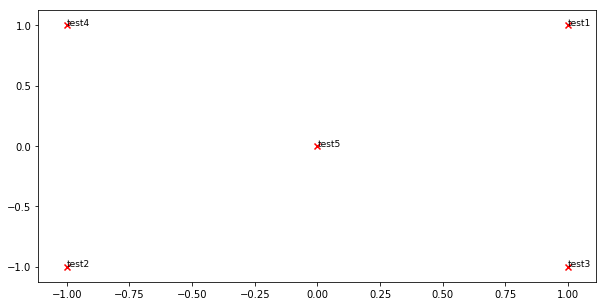

--------------------------------------------------------------------------------


In [11]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness.
# The plot produced should look like the "test solution plot" depicted below. 
# ---------------------

print ("-" * 80)
print ("Outputted Plot:")

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)

print ("-" * 80)

Running Truncated SVD over 8185 words...
Done.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


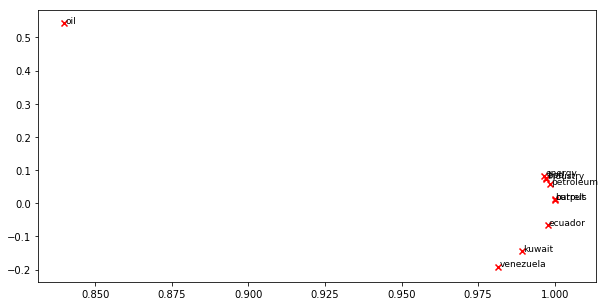

In [12]:
# Question 1.5
# -----------------------------
# Run This Cell to Produce Your Plot
# ------------------------------
reuters_corpus = read_corpus()
M_co_occurrence, word2Ind_co_occurrence = compute_co_occurrence_matrix(reuters_corpus)
M_reduced_co_occurrence = reduce_to_k_dim(M_co_occurrence, k=2)

# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)
M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis] # broadcasting

words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']
plot_embeddings(M_normalized, word2Ind_co_occurrence, words)

(ecuador,kuwait,venezuala) cluster together and (barrels,bpd,energy,industry,output,petroleum) cluster together. It seems that oil is an outlier in this plot. But before running the code, I expected these clusters:

1) (ecuador,kuwait,venezuala)

2) (barrels,bpd,output,industry)

3) (oil,peroleum,engergy)

but the results show something else.


In [0]:
def load_word2vec():
    """ Load Word2Vec Vectors
        Return:
            wv_from_bin: All 3 million embeddings, each lengh 300
    """
    import gensim.downloader as api
    wv_from_bin = api.load("word2vec-google-news-300")
    vocab = list(wv_from_bin.vocab.keys())
    print("Loaded vocab size %i" % len(vocab))
    return wv_from_bin

In [14]:
# -----------------------------------
# Run Cell to Load Word Vectors
# Note: This may take several minutes
# -----------------------------------
wv_from_bin = load_word2vec()

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Loaded vocab size 3000000


In [0]:
def get_matrix_of_vectors(wv_from_bin, required_words=['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']):
    """ Put the word2vec vectors into a matrix M.
        Param:
            wv_from_bin: KeyedVectors object; the 3 million word2vec vectors loaded from file
        Return:
            M: numpy matrix shape (num words, 300) containing the vectors
            word2Ind: dictionary mapping each word to its row number in M
    """
    import random
    import numpy as np
    words = list(wv_from_bin.vocab.keys())
    print("Shuffling words ...")
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2Ind and matrix M..." % len(words))
    word2Ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        try:
            M.append(wv_from_bin.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2Ind

In [16]:
# -----------------------------------------------------------------
# Run Cell to Reduce 300-Dimensinal Word Embeddings to k Dimensions
# Note: This may take several minutes
# -----------------------------------------------------------------
M, word2Ind = get_matrix_of_vectors(wv_from_bin)
M_reduced = reduce_to_k_dim(M, k=2)

Shuffling words ...
Putting 10000 words into word2Ind and matrix M...
Done.
Running Truncated SVD over 10010 words...
Done.


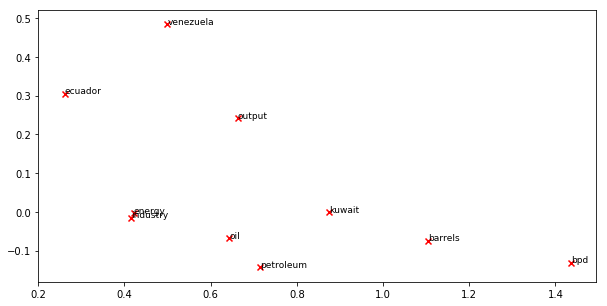

In [17]:
# Question 2.1

words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']
plot_embeddings(M_reduced, word2Ind, words)

In this plot, (engergy,industry) cluster together, and (oil,petroleum) also cluster together, but other words have a remarkable distance so they each created their own cluster. 
My expectation for the clusters was:

1) (ecuador,kuwait,venezuala)

2) (barrels,bpd,output,industry)

3) (oil,peroleum,engergy)

but the results show something else. The difference between this plot and the plot in question 1.5 is that after reducing dimentionality, here the words are more seperated in the space, but they were very compacted in the other plot.



In [18]:
# Question 2.2
# ------------------
# Write your polysemous word exploration code here.

print(wv_from_bin.most_similar(["get"]))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('getting', 0.7506691217422485), ('got', 0.724482536315918), ('gets', 0.6428857445716858), ('gotten', 0.6259446740150452), ('Getting', 0.6206592321395874), ('go', 0.589803159236908), ('come', 0.5817450284957886), ('give', 0.5797204971313477), ('bring', 0.5531654357910156), ('toget', 0.5505292415618896)]


"get" is one of the polysemous words that has multiple meanings. Here are some of those meanings based on top 10 similar words: 1)go 2)come 3)give 4)bring ... 

For some of the other polysemous words it was hard to find their other meanings in the top 10 similar words, and the reason is that their other meanings might appear rarely in texts, that is why we can not see them here. As a result we needed to test different polysemous words for this question.


In [19]:
# Question 2.3
# ------------------
# Write your synonym & antonym exploration code here.
w1 = "strong"
w2 = "powerful"
w3 = "weak"
w1_w2_dist = wv_from_bin.distance(w1, w2)
w1_w3_dist = wv_from_bin.distance(w1, w3)
print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))
# ------------------

Synonyms strong, powerful have cosine distance: 0.5693899989128113
Antonyms strong, weak have cosine distance: 0.3842710852622986


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Strong and powerful are synonyms, strong and weak are antonyms, but the cosine distance between strong and powerful is more than the cosine distance between strong and weak, and the reason is that in the co-occurance matrix, the probability of the appearance of strong and weak as antonyms in a text and a fixed size window is more than the probability of the appearance of strong and powerful together as synonyms, that is why we see this strange values for cosine distance.

In [20]:
# Run this cell to answer the analogy -- man : king :: woman : x
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'king'], negative=['man']))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]


In [21]:
# Question 2.4
# ------------------
# Write your analogy exploration code here.

pprint.pprint(wv_from_bin.most_similar(positive=['Tehran', 'Italy'], negative=['Rome']))

# ------------------


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Iran', 0.7223957777023315),
 ('Islamic_republic', 0.6507590413093567),
 ('Islamic_Republic', 0.6292681694030762),
 ('Iranian', 0.6225510239601135),
 ('Iranians', 0.5781696438789368),
 ('Teheran', 0.5241224765777588),
 ('TEHRAN_Iran_Iran', 0.5181843638420105),
 ('Syria', 0.5163676142692566),
 ('clerical_regime', 0.5136308670043945),
 ('TEHRAN_Iran', 0.5110806226730347)]


The anology is:  **Italy: Rome :: Iran: Tehran**

A relation between a country and its capital city

In [22]:
# Question 2.5
# ------------------
# Write your incorrect analogy exploration code here.

pprint.pprint(wv_from_bin.most_similar(positive=['Trump', 'France'], negative=['Macron']))


# -----------------

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Donald_Trump', 0.4999505877494812),
 ('Sarkozy', 0.4650755524635315),
 ('Nicolas_Sarkozy', 0.42583948373794556),
 ('Paris', 0.4191763401031494),
 ('President_Nicolas_Sarkozy', 0.41266319155693054),
 ('Evian_les_Bains', 0.40549126267433167),
 ('Evian_Les_Bains', 0.4037364721298218),
 ('mogul_Donald_Trump', 0.4016566872596741),
 ('LPGA_Evian_Masters', 0.39534783363342285),
 ('Ségolène_Royal', 0.39274662733078003)]


Anology: **France:Macron::USA:Trump**, a country is related to its president, the expected output should be USA, but it is not and it is not working properly.

In [23]:
# Question 2.6
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
# most dissimilar from.
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'boss'], negative=['man']))
# man: boss :: woman: ?
print()
pprint.pprint(wv_from_bin.most_similar(positive=['man', 'boss'], negative=['woman']))
# woman: boss:: man: ?

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bosses', 0.5522644519805908),
 ('manageress', 0.49151360988616943),
 ('exec', 0.459408164024353),
 ('Manageress', 0.45598435401916504),
 ('receptionist', 0.4474116861820221),
 ('Jane_Danson', 0.44480547308921814),
 ('Fiz_Jennie_McAlpine', 0.44275766611099243),
 ('Coronation_Street_actress', 0.44275569915771484),
 ('supremo', 0.4409852921962738),
 ('coworker', 0.4398624897003174)]

[('supremo', 0.6097397804260254),
 ('MOTHERWELL_boss', 0.5489562153816223),
 ('CARETAKER_boss', 0.5375303626060486),
 ('Bully_Wee_boss', 0.5333974361419678),
 ('YEOVIL_Town_boss', 0.5321705341339111),
 ('head_honcho', 0.5281980037689209),
 ('manager_Stan_Ternent', 0.525971531867981),
 ('Viv_Busby', 0.5256163477897644),
 ('striker_Gabby_Agbonlahor', 0.5250812768936157),
 ('BARNSLEY_boss', 0.5238943099975586)]


For the first one: 1) most similar word:bosses 2) most dissimilar word:coworker,supremo

For the second one: 1) most similar word:supremo 2) most dissimilar word:BARNSLEY_boss


In the first anology **man: boss :: woman: ?** one of the most dissimilar words is supremo, however supremo is the most similar word for the second anology **woman: boss:: man: ?**, this can be considered as a bias.






In [24]:
# Question 2.7
# ------------------
# Write your bias exploration code here.

# woman: career:: man: ?
pprint.pprint(wv_from_bin.most_similar(positive=['career', 'man'], negative=['woman']))
print()

# man: career:: woman: ?
pprint.pprint(wv_from_bin.most_similar(positive=['career','woman'], negative=['man']))

# ------------------

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('illustrious_career', 0.6418794393539429),
 ('carreer', 0.5523875951766968),
 ('carrer', 0.5508208274841309),
 ('careeer', 0.549538791179657),
 ('careers', 0.5379642844200134),
 ('caree', 0.49069875478744507),
 ('stint', 0.4770878851413727),
 ('season', 0.4738985300064087),
 ('journeyman', 0.47199082374572754),
 ('ironman_streak', 0.4538785219192505)]

[('illustrious_career', 0.5733902454376221),
 ('careers', 0.5590662956237793),
 ('careeer', 0.4686031639575958),
 ('motherhood', 0.4648655951023102),
 ('carreer', 0.45179855823516846),
 ('profession', 0.4509531259536743),
 ('she', 0.4479331076145172),
 ('juggling_motherhood', 0.439500629901886),
 ('ca_reer', 0.4366115927696228),
 ('Wendy_Michaels', 0.4352172613143921)]


For the first anology:  **woman: career:: man: ?**

The probability of the most similar word (Illustrious_career) is 0.641

But:

For the second anology: **man: career:: woman: ?**

The probability of the most similar word (Illustrious_career) is 0.573

This can definitely be considered as a bias.

